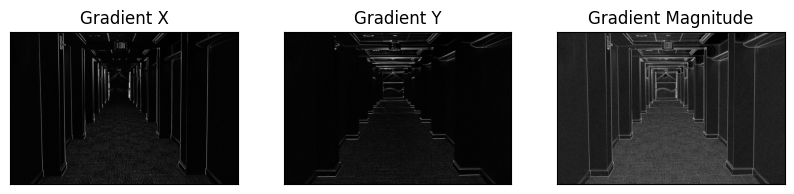

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('hallway.png', cv2.IMREAD_GRAYSCALE)

# Estimate gradient components using Sobel masks
grad_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
grad_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

# Absolute values of gradients
abs_grad_x = cv2.convertScaleAbs(grad_x)
abs_grad_y = cv2.convertScaleAbs(grad_y)

# Total gradient magnitude
grad_magnitude = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

# Gamma correction for better visualization
gamma = 0.5
grad_magnitude_corrected = np.power(grad_magnitude/float(np.max(grad_magnitude)), gamma)

# Display absolute gradient values and gradient magnitude
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1), plt.imshow(abs_grad_x, cmap='gray')
plt.title('Gradient X'), plt.xticks([]), plt.yticks([])
plt.subplot(1, 3, 2), plt.imshow(abs_grad_y, cmap='gray')
plt.title('Gradient Y'), plt.xticks([]), plt.yticks([])
plt.subplot(1, 3, 3), plt.imshow(grad_magnitude_corrected, cmap='gray')
plt.title('Gradient Magnitude'), plt.xticks([]), plt.yticks([])
plt.show()


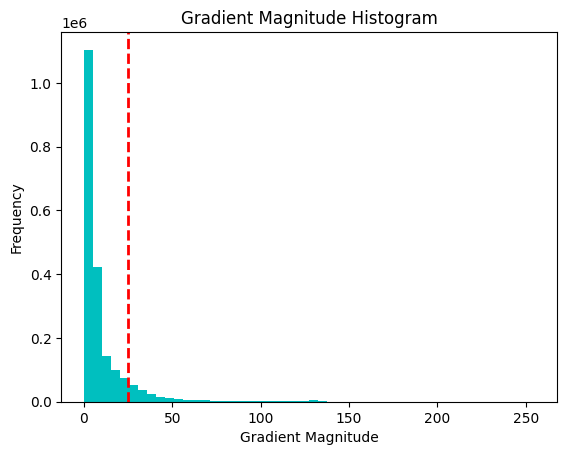

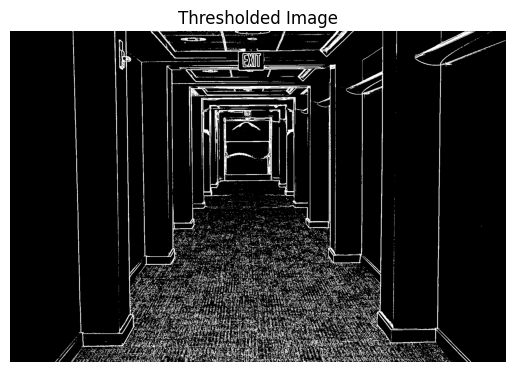

In [3]:
# Apply global thresholding to the gradient magnitude image
threshold_value = 25
_, thresholded_image = cv2.threshold(grad_magnitude, threshold_value, 255, cv2.THRESH_BINARY)

# Display histogram of gradient magnitude and the chosen threshold
plt.hist(grad_magnitude.flatten(), bins=50, color='c')
plt.axvline(x=threshold_value, color='r', linestyle='--', linewidth=2)
plt.title('Gradient Magnitude Histogram')
plt.xlabel('Gradient Magnitude')
plt.ylabel('Frequency')
plt.show()

# Display the thresholded image
plt.imshow(thresholded_image, cmap='gray')
plt.title('Thresholded Image')
plt.axis('off')
plt.show()


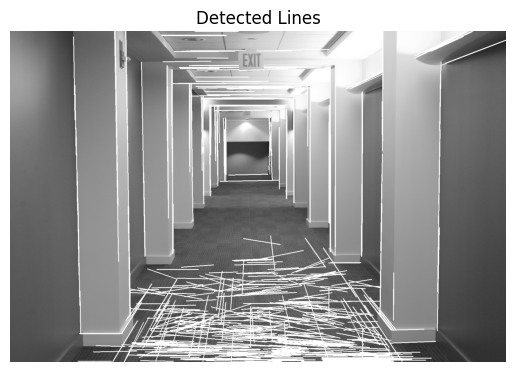

In [5]:
# Apply Hough transform for line detection
lines = cv2.HoughLinesP(thresholded_image, 1, np.pi/180, threshold=25, minLineLength=100, maxLineGap=10)

# Draw detected lines on the original image
line_image = np.copy(image)
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 2)

# Display the image with detected lines
plt.imshow(cv2.cvtColor(line_image, cv2.COLOR_BGR2RGB))
plt.title('Detected Lines')
plt.axis('off')
plt.show()
